In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data_df=[]
with open("C:\\Users\\usr\\Desktop\\New folder\\Toyota.csv")as f:
    data_df=f.read()

In [3]:
# Import .csv file and convert it to a DataFrame object
df=pd.read_csv("C:\\Users\\usr\\Desktop\\New folder\\Toyota.csv",encoding="ISO-8859-1")
df.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [7]:
toyota1= df.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota1.rename(columns={"Age_08_04":"Age"},inplace=True)


C:\Users\usr\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
eda=toyota1.describe()

{'whiskers': [<matplotlib.lines.Line2D at 0x19a46b945b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a46b94c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a46b94250>],
 'medians': [<matplotlib.lines.Line2D at 0x19a46ba0370>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a46ba0670>],
 'means': []}

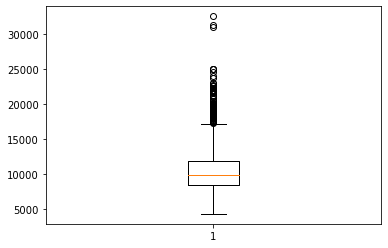

In [9]:
plt.boxplot(toyota1["Price"])


{'whiskers': [<matplotlib.lines.Line2D at 0x19a46c34100>,
 'caps': [<matplotlib.lines.Line2D at 0x19a46c347c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a46c26d60>],
 'medians': [<matplotlib.lines.Line2D at 0x19a46c34eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a46c40190>],
 'means': []}

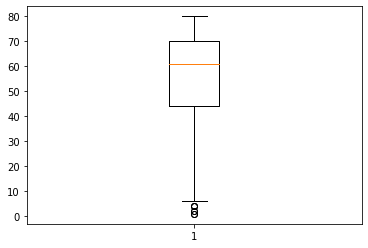

In [10]:
plt.boxplot(toyota1["Age"])


{'whiskers': [<matplotlib.lines.Line2D at 0x19a46c8fbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a46c9e2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a46c8f880>],
 'medians': [<matplotlib.lines.Line2D at 0x19a46c9e970>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a46c9ec70>],
 'means': []}

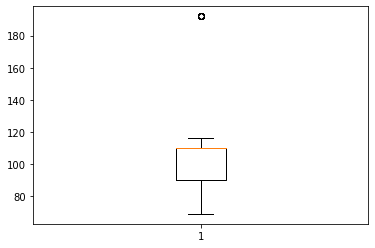

In [11]:
plt.boxplot(toyota1["HP"])


{'whiskers': [<matplotlib.lines.Line2D at 0x19a46cf4490>,
 'caps': [<matplotlib.lines.Line2D at 0x19a46cf4b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a46cf4130>],
 'medians': [<matplotlib.lines.Line2D at 0x19a46cfd220>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a46cfd520>],
 'means': []}

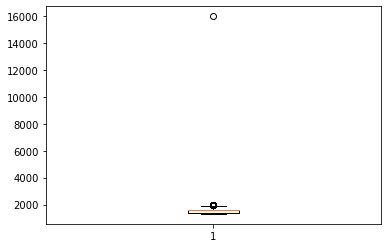

In [12]:
plt.boxplot(toyota1["cc"])


{'whiskers': [<matplotlib.lines.Line2D at 0x19a46d52430>,
 'caps': [<matplotlib.lines.Line2D at 0x19a46d52af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a46d520d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19a46d5b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a46d5b520>],
 'means': []}

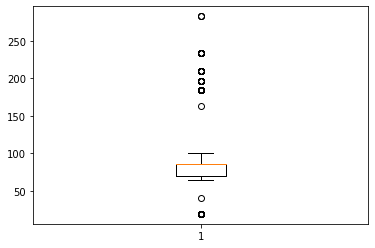

In [13]:
plt.boxplot(toyota1["Quarterly_Tax"])


{'whiskers': [<matplotlib.lines.Line2D at 0x19a46da8310>,
 'caps': [<matplotlib.lines.Line2D at 0x19a46da89d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a46d99f40>],
 'medians': [<matplotlib.lines.Line2D at 0x19a46db40d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a46db43d0>],
 'means': []}

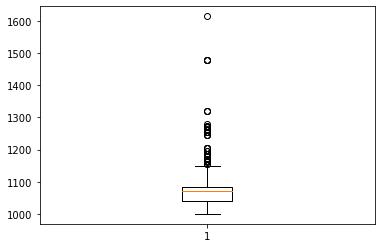

In [14]:
plt.boxplot(toyota1["Weight"])

In [ ]:
##All the data is not normally distributed. Price, Age, KM, HP, Quarterly_Tax and Weight have outliers. 

In [16]:
import statsmodels.api as sm

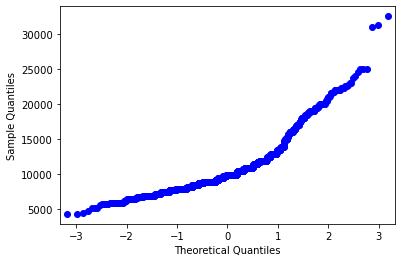

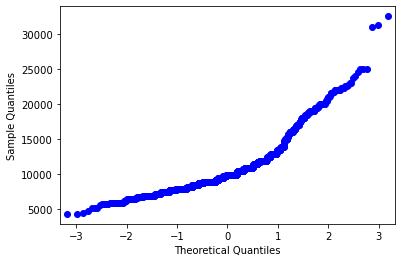

In [17]:
sm.graphics.qqplot(toyota1["Price"])

In [ ]:
##shows the data "Price" is not normal 

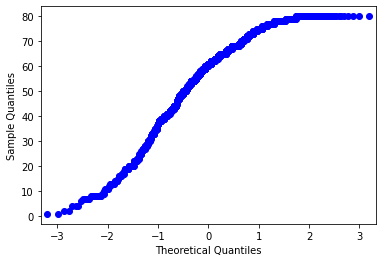

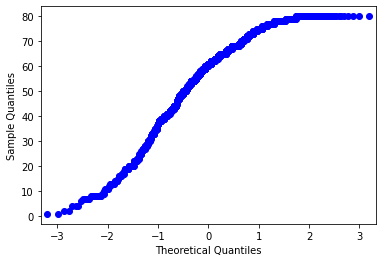

In [18]:
sm.graphics.qqplot(toyota1["Age"])

In [ ]:
## shows "Age" is not normal. Data is discrete count 

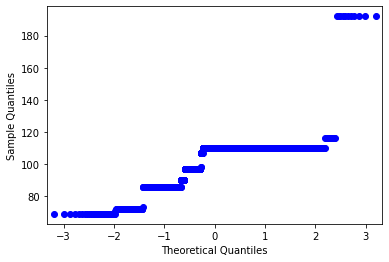

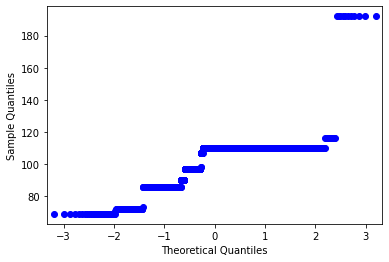

In [24]:
sm.graphics.qqplot(toyota1["HP"])

In [ ]:
## Data is discrete count

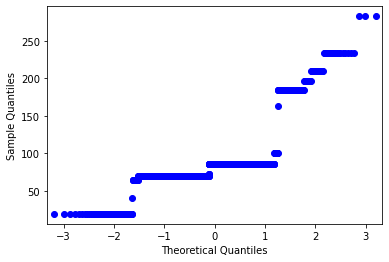

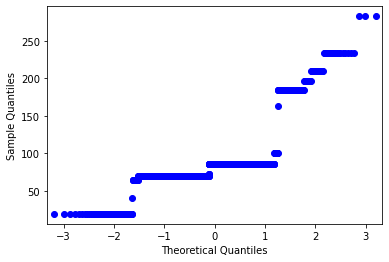

In [25]:
sm.graphics.qqplot(toyota1["Quarterly_Tax"])

In [ ]:
## Data is discrete count

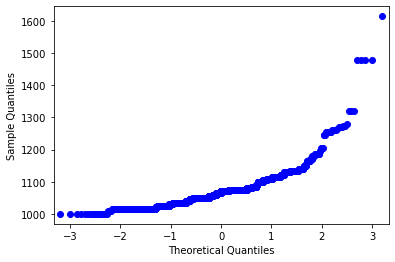

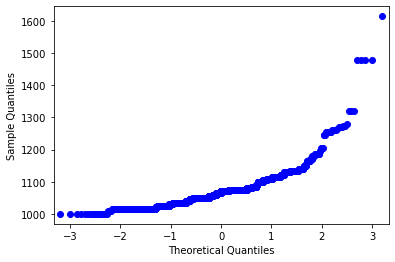

In [26]:
sm.graphics.qqplot(toyota1["Weight"])

In [ ]:
## Data is not normal. And it shows it is discrete count

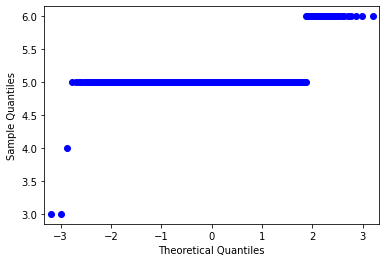

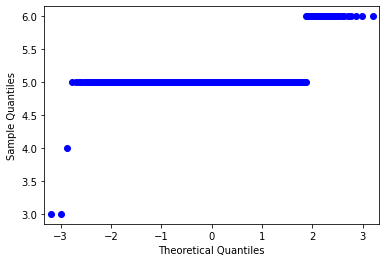

In [27]:
sm.graphics.qqplot(toyota1["Gears"])

In [ ]:
## Data is discrete categorical

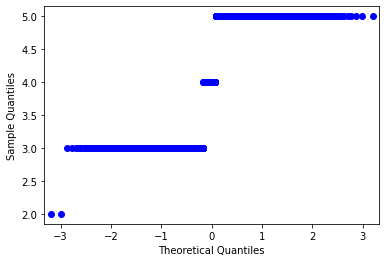

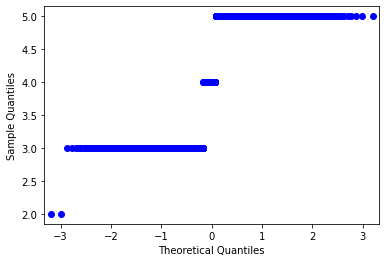

In [28]:
sm.graphics.qqplot(toyota1["Doors"])

In [ ]:
## Data is discrete categorical 

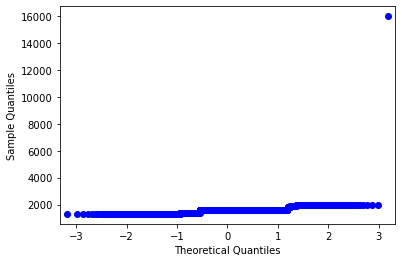

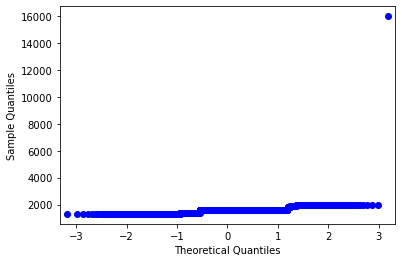

In [29]:
sm.graphics.qqplot(toyota1["cc"])

In [ ]:
## Again data is discrete count data.

(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <a list of 10 Patch objects>)

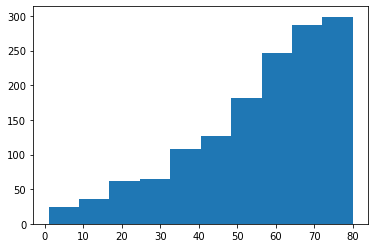

In [30]:
plt.hist(toyota1["Age"]) 

 
 

In [ ]:
## This shows the data is highly left skewed

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <a list of 10 Patch objects>)

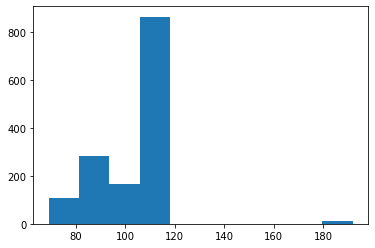

In [31]:
plt.hist(toyota1["HP"])

In [ ]:
## The data is very unevenly distributed, Left skewed

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <a list of 10 Patch objects>)

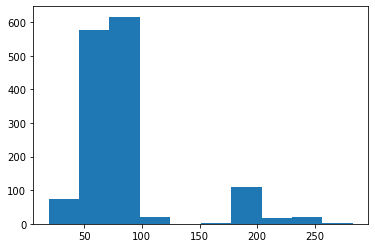

In [32]:
plt.hist(toyota1["Quarterly_Tax"])

In [ ]:
# The data is unevenly distributed, right skewed data

(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <a list of 10 Patch objects>)

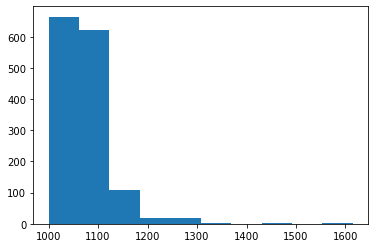

In [33]:
plt.hist(toyota1["Weight"])

In [ ]:
# The data is right skewed.

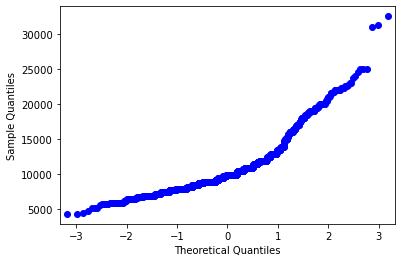

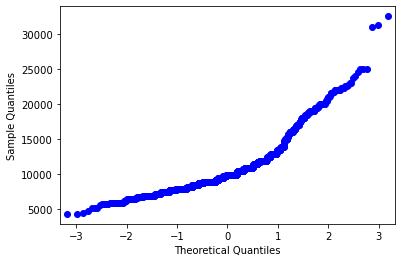

In [34]:
sm.graphics.qqplot(toyota1["Price"]) 

In [ ]:
##shows the data "Price" is not normal 



In [35]:
 import statsmodels.formula.api as smf
m1= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota1).fit()
m1.summary()## 0.864

 
 
 
 
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
##cc and Doors are insignificant


In [36]:
## building on individual model
m1_cc = smf.ols("Price~cc",data= toyota1).fit()
m1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.55e-06
Time:                        10:28:25   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## cc is significant


In [37]:
m1_doors = smf.ols("Price~Doors", data= toyota1).fit()
m1_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.46e-12
Time:                        10:29:02   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## doors is also significant


In [38]:
m1_to = smf.ols("Price~cc+Doors",data= toyota1).fit()
m1_to.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.15e-15
Time:                        10:29:39   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## both are signifiant

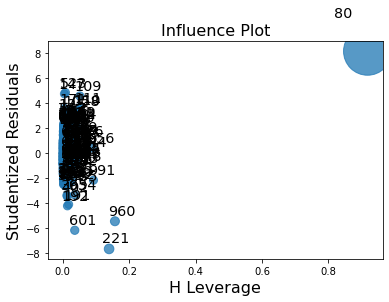

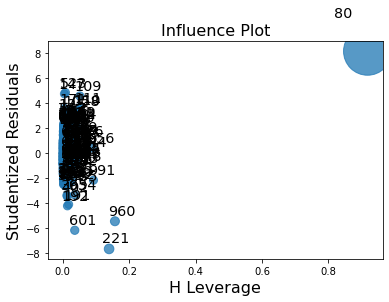

In [39]:
##plotting the influence plot
import statsmodels.api as sm
sm.graphics.influence_plot(m1)


In [41]:
##removing 80 and checking for significance
toyota2= toyota1.drop(df.index[[80]],axis=0)
m2= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:31:18   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age            -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## Doors is insignificant

In [43]:
## removing 80 and 221, where 221 is the next most influencing index
toyota3 = toyota1.drop(df.index[[80,221]],axis=0)


In [44]:
m3= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota3).fit()
m3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:32:23   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age            -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## Doors is insignificant


In [46]:
## removing 80,221,960, where 960 is the next most influencing index after 80,221
toyota4= toyota1.drop(df.index[[80,221,960]],axis=0)

In [47]:
m4= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota4).fit()
m4.summary() ### 0.885( r squared)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:33:39   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
## all the variables are significant

## As all the vaiables are significant, we select it as the final model

##### final model####### 

In [49]:
finalmodel = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota4).fit()
finalmodel.summary()### 0.885( r squared)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:34:17   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
##prediction#
finalmodel_pred = finalmodel.predict(toyota4)


Text(0, 0.5, 'Predicted values')

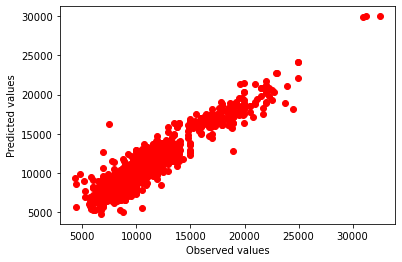

In [51]:
### validation
#### Linerarity ###
plt.scatter(toyota4["Price"],finalmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Predicted values")
##the observed values and fitted values are linear


Text(0, 0.5, 'Residuals')

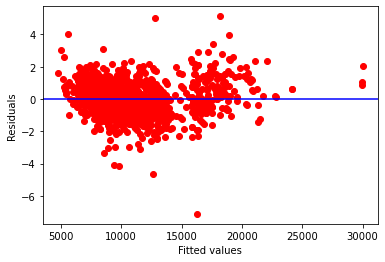

In [52]:
### Residuals v/s Fitted values
plt.scatter(finalmodel_pred, finalmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")
## errors are kind off homoscadasticity i.e there is equal variance


(array([  1.,   0.,   3.,  16., 157., 723., 436.,  87.,   6.,   4.]),
 array([-7.11152315, -5.88819747, -4.6648718 , -3.44154612, -2.21822044,
        -0.99489476,  0.22843092,  1.4517566 ,  2.67508227,  3.89840795,
         5.12173363]),
 <a list of 10 Patch objects>)

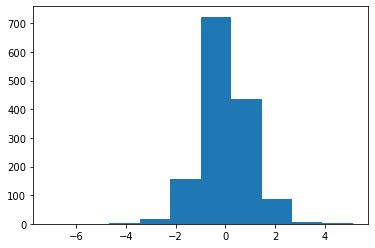

In [53]:
###Normality
## histogram--- for checking if the errors are normally distributed or not.
plt.hist(finalmodel.resid_pearson) 


((array([-3.29990572, -3.0423199 , -2.89905096, ...,  2.89905096,
          3.0423199 ,  3.29990572]),
  array([-7.11152315, -4.61523681, -4.13985897, ...,  4.01261664,
          5.00012015,  5.12173363])),
 (0.9842286314351308, -2.128875074956665e-12, 0.9853340591988056))

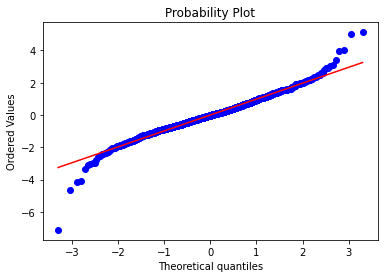

In [54]:
## QQ plot
import pylab
import scipy.stats as st
st.probplot(finalmodel.resid_pearson, dist='norm',plot=pylab)
## Errors are normally distributed

In [55]:
## test
from sklearn.model_selection import train_test_split


In [56]:
train_data,test_Data= train_test_split(toyota1,test_size=0.3)


In [57]:
finalmodel1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()
finalmodel1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     716.0
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:37:01   Log-Likelihood:                -8693.6
No. Observations:                1005   AIC:                         1.741e+04
Df Residuals:                     996   BIC:                         1.745e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3558.6454   1642.473     -2.167      0.030   -6781.751    -335.540
Age            -123.0685      3.240    -37.979      0.000    -129.427    -116.710
KM               -0.0213      0.002    -13.638      0.000      -0.024      -0.018
HP               34.5680      3.333     10.370      0.000      28.027      41.109
cc               -0.0607      0.094     -0.644      0.520      -0.246       0.124
Doors            17.7439     49.261      0.360      0.719     -78.922     114.410
Gears           598.2336    224.587      2.664      0.008     157.516    1038.951
Quarterly_Tax     5.0257      1.552      3.238      0.001       1.980       8.072
Weight           14.6493      1.261     11.616      0.000      12.174      17.124
==============================================================================
Omnibus:                       93.681   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.969
Skew:                          -0.100   Prob(JB):                    2.31e-125
Kurtosis:                       6.697   Cond. No.                     2.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
## prediction
finalmodel_pred = finalmodel1.predict(train_data)
finalmodel_pred

226     13059.829877
163     17888.888194
1036     9750.359739
156     17577.503169
531     10979.199395
            ...     
638      9179.859432
1112     7245.682465
730      9988.624408
601     15101.869955
722     10019.581243
Length: 1005, dtype: float64

In [70]:
#train residuals
finalmodel_res = train_data["Price"]-finalmodel_pred
finalmodel_res

226    -1109.829877
163     1611.111806
1036    -800.359739
156     1922.496831
531     -729.199395
           ...     
638     1270.140568
1112     504.317535
730     1511.375592
601    -7601.869955
722    -1269.581243
Length: 1005, dtype: float64

In [71]:
##train rmse
finalmodel_rmse = np.sqrt(np.mean(finalmodel_res*finalmodel_res))
finalmodel_rmse

1382.1398746995606

In [72]:
## test prediction
finalmodel_testpred = finalmodel1.predict(test_Data)
finalmodel_testpred 

254     13127.495683
499     10358.916199
119     19742.955483
301     12955.653782
333     13157.329668
            ...     
86      15489.634988
355     14141.433677
1117     6233.023352
394     10232.942121
640      8157.673117
Length: 431, dtype: float64

In [73]:
## test residuals
finalmodel_testres= test_Data["Price"]-finalmodel_testpred
finalmodel_testres

254    -3187.495683
499     -408.916199
119     2507.044517
301     -455.653782
333    -1407.329668
           ...     
86      -589.634988
355     -391.433677
1117    1366.976648
394     -282.942121
640     1792.326883
Length: 431, dtype: float64

In [74]:
## test rmse
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))
finalmodel_testrmse 

1240.6856942028644

In [68]:
### train rmse is 1380 and test rmse is 1240